In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style

In [2]:
#Import Composite Leading Indicator data from excel into pandas DataFrame
CLI_file = 'Resources/CLI_OECD.xlsx'
CLI_data_raw = pd.read_excel(CLI_file)
CLI_data_renamed_columns = CLI_data_raw.rename(columns={'Jan-56 *M Disaggregate_First':'Date','C156LIAT@OECDMEI':'CLI Value'})
CLI_data_noheaders = CLI_data_renamed_columns.iloc[7:]
CLI_data_reset_index = CLI_data_noheaders.reset_index()
CLI_data_reset_index.drop('index',axis=1,inplace=True)
CLI_data_fill_na_values = CLI_data_reset_index.fillna(method='ffill')
CLI_data_fill_na_values['Date'] = CLI_data_fill_na_values['Date'].apply(lambda x: pd.to_datetime(x,format='%b-%y'))
CLI_data_fill_na_values.set_index('Date',inplace=True)

#Import Housing Data from CSV
housing_file = 'Resources/housing_data.csv'
housing = pd.read_csv(housing_file,index_col=0)
housing['date'] = pd.to_datetime(housing['date'],format='%Y-%m-%d')
housing.set_index('date',inplace=True)

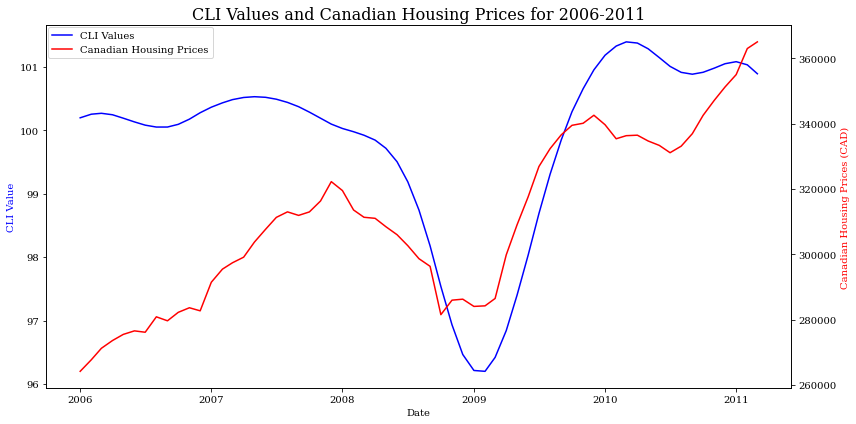

In [42]:
#Plot CLI Indicator with 2008 housing data
CLI_data_2006to2011 = CLI_data_fill_na_values['2006-01-01':'2011-03-01']
housing_data_2006to2011 = housing['2006-01-01':'2011-03-01']

fig,ax1 = plt.subplots(figsize=(12,6))

ax1.plot(CLI_data_2006to2011.index,CLI_data_2006to2011,color='blue',label='CLI Values')
ax1.set_xlabel('Date')
ax1.set_ylabel('CLI Value',color='blue')

ax2 = ax1.twinx()

ax2.plot(housing_data_2006to2011.index,housing_data_2006to2011,color='red',label='Canadian Housing Prices')
ax2.set_ylabel('Canadian Housing Prices (CAD)',color='red')

plt.title('CLI Values and Canadian Housing Prices for 2006-2011',fontsize=16)

fig.legend(bbox_to_anchor=(0.05,.93),loc='upper left')
plt.tight_layout()
plt.rc('font', family='serif')
plt.savefig('Images/CLI Values and Canadian Housing Prices for 2006-2011')

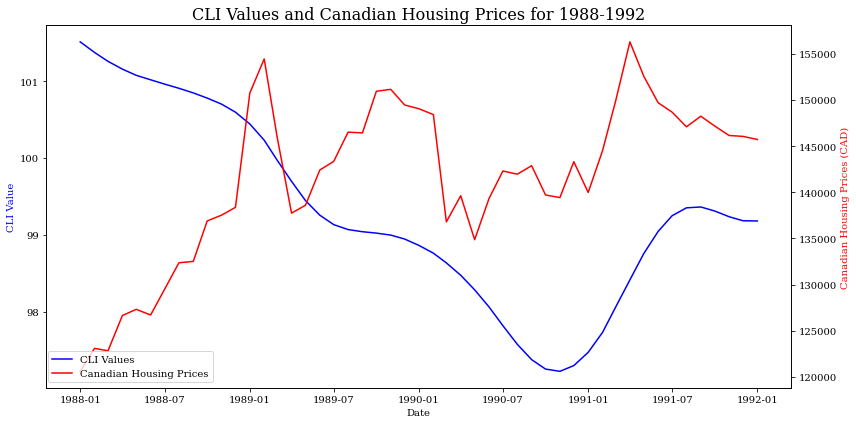

In [49]:
#Plot CLI Indicator with 1990 housing data
CLI_data_1987to1992 = CLI_data_fill_na_values['1988-01-01':'1992-01-01']
housing_data_1988to1992 = housing['1988-01-01':'1992-01-01']

fig,ax1 = plt.subplots(figsize=(12,6))

ax1.plot(CLI_data_1987to1992.index,CLI_data_1987to1992,color='blue',label='CLI Values')
ax1.set_xlabel('Date')
ax1.set_ylabel('CLI Value',color='blue')
ax2 = ax1.twinx()

ax2.plot(housing_data_1988to1992.index,housing_data_1988to1992,color='red',label='Canadian Housing Prices')
ax2.set_ylabel('Canadian Housing Prices (CAD)',color='red')

plt.title('CLI Values and Canadian Housing Prices for 1988-1992',fontsize=16)
fig.legend(bbox_to_anchor=(0.05,0.18),loc='upper left')
plt.tight_layout()
plt.rc('font', family='serif')
plt.savefig('Images/CLI Values and Canadian Housing Prices for 1988-1992')

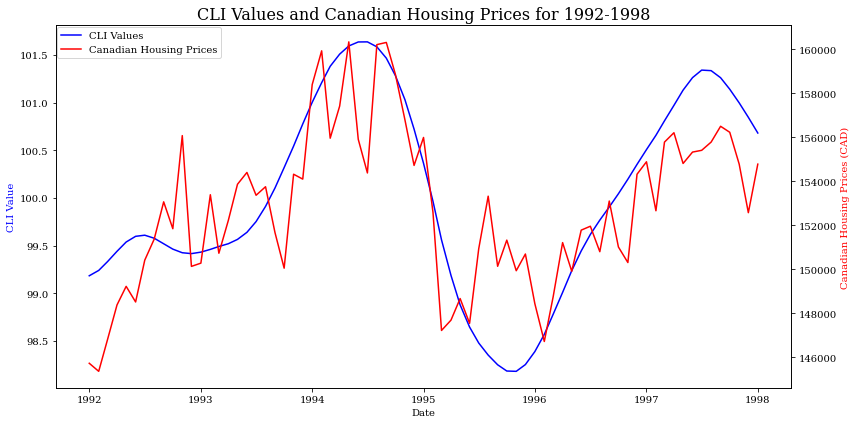

In [46]:
#Plot CLI Indicator with housing data from 1992 to 1998
CLI_data_2012topresent = CLI_data_fill_na_values['1992-01-01':'1998-01-01']
housing_data_2012topresent = housing['1992-01-01':'1998-01-01']

fig,ax1 = plt.subplots(figsize=(12,6))

ax1.plot(CLI_data_2012topresent.index,CLI_data_2012topresent,color='blue',label='CLI Values')
ax1.set_xlabel('Date')
ax1.set_ylabel('CLI Value',color='blue')
ax2 = ax1.twinx()

ax2.plot(housing_data_2012topresent.index,housing_data_2012topresent,color='red',label='Canadian Housing Prices')
ax2.set_ylabel('Canadian Housing Prices (CAD)',color='red')

plt.title('CLI Values and Canadian Housing Prices for 1992-1998',fontsize=16)
fig.legend(bbox_to_anchor=(0.06,.93),loc='upper left')
plt.tight_layout()
plt.rc('font', family='serif')
plt.savefig('Images/CLI Values and Canadian Housing Prices for 2012-2020')